In [1]:
import zipfile as zf
files = zf.ZipFile("archive.zip", 'r')
files.extractall('directory to extract')
files.close()

In [2]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import glob
import os
import matplotlib.pyplot as plt

In [3]:
# importing libraries
import numpy as np # For numerical computation
import pandas as pd # Data manipulation
import seaborn as sns # plotting
import scipy.io # reading matlab files in python
from scipy import signal #signal processing
from scipy.fftpack import fft, dct #signal processing

from sklearn.linear_model import LinearRegression #linear regression model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, train_test_split # cross validation split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt # For plotting graphs(Visualization)

import os # system-wide functions


In [4]:
sample_file = scipy.io.loadmat(f'archive/part_1.mat')
print(f'sample_file Data type: {type(sample_file)}')
print(f'sample_file keys:\n{sample_file.keys()}')

sample_file Data type: <class 'dict'>
sample_file keys:
dict_keys(['__header__', '__version__', '__globals__', 'p'])


In [5]:
# Loading a sample .mat file to understand the data dimensions
test_sample = scipy.io.loadmat(f'archive/part_1.mat')['p']
print(f'test_sample Data type: {type(test_sample)}')
print(f'test_sample shape/dimensions: {test_sample.shape}')

test_sample Data type: <class 'numpy.ndarray'>
test_sample shape/dimensions: (1, 1000)


In [6]:
print(f"Total Samples: {len(test_sample[0])}")
print(f"Number of readings in each sample(column): {len(test_sample[0][0])}")
print(f"Number of samples in each reading(ECG): {len(test_sample[0][0][2])}")

temp_mat = test_sample[0, 999]
temp_length = temp_mat.shape[1]
sample_size = 125


print(temp_length)
print((int)(temp_length/sample_size))

Total Samples: 1000
Number of readings in each sample(column): 3
Number of samples in each reading(ECG): 61000
9000
72


In [7]:
temp_mat.shape

(3, 9000)

In [8]:
sample_size = 125
ppg = []
for i in range(1000):
    temp_mat = test_sample[0, i]
    temp_length = temp_mat.shape[1]
    for j in range((int)(temp_length/sample_size)):
        temp_ppg = temp_mat[0, j*sample_size:(j+1)*sample_size]
        ppg.append(temp_ppg)

In [9]:
ecg = []
bp = []
size = 125 #sample size

for i in range(1000):
    temp_mat = test_sample[0, i]
    temp_length = temp_mat.shape[1]
    for j in range((int)(temp_length/sample_size)):
        temp_ecg = temp_mat[2, j*size:(j+1)*size]
        temp_bp = temp_mat[1, j*size:(j+1)*size]
        ecg.append(temp_ecg)
        bp.append(temp_bp)

In [10]:
for i in range(2,12):
  sample_file = scipy.io.loadmat(f'archive/part_'+str(i)+'.mat')
  print(f'sample_file Data type: {type(sample_file)}')
  print(f'sample_file keys:\n{sample_file.keys()}')
  # Loading a sample .mat file to understand the data dimensions
  test_sample = scipy.io.loadmat(f'archive/part_'+str(i)+'.mat')['p']
  print(f'test_sample Data type: {type(test_sample)}')
  print(f'test_sample shape/dimensions: {test_sample.shape}')
  print(f"Total Samples: {len(test_sample[0])}")
  print(f"Number of readings in each sample(column): {len(test_sample[0][0])}")
  print(f"Number of samples in each reading(ECG): {len(test_sample[0][0][2])}")

  temp_mat = test_sample[0, 999]
  temp_length = temp_mat.shape[1]
  sample_size = 125


  print(temp_length)
  print((int)(temp_length/sample_size))
  for i in range(1000):
      temp_mat = test_sample[0, i]
      temp_length = temp_mat.shape[1]
      for j in range((int)(temp_length/sample_size)):
          temp_ppg = temp_mat[0, j*sample_size:(j+1)*sample_size]
          ppg.append(temp_ppg)
  for i in range(1000):
      temp_mat = test_sample[0, i]
      temp_length = temp_mat.shape[1]
      for j in range((int)(temp_length/sample_size)):
          temp_ecg = temp_mat[2, j*size:(j+1)*size]
          temp_bp = temp_mat[1, j*size:(j+1)*size]
          ecg.append(temp_ecg)
          bp.append(temp_bp)


sample_file Data type: <class 'dict'>
sample_file keys:
dict_keys(['__header__', '__version__', '__globals__', 'p'])
test_sample Data type: <class 'numpy.ndarray'>
test_sample shape/dimensions: (1, 1000)
Total Samples: 1000
Number of readings in each sample(column): 3
Number of samples in each reading(ECG): 6000
61000
488
sample_file Data type: <class 'dict'>
sample_file keys:
dict_keys(['__header__', '__version__', '__globals__', 'p'])
test_sample Data type: <class 'numpy.ndarray'>
test_sample shape/dimensions: (1, 1000)
Total Samples: 1000
Number of readings in each sample(column): 3
Number of samples in each reading(ECG): 65000
64000
512
sample_file Data type: <class 'dict'>
sample_file keys:
dict_keys(['__header__', '__version__', '__globals__', 'p'])
test_sample Data type: <class 'numpy.ndarray'>
test_sample shape/dimensions: (1, 1000)
Total Samples: 1000
Number of readings in each sample(column): 3
Number of samples in each reading(ECG): 57000
1000
8
sample_file Data type: <class

In [11]:
# Reshaping the ecg, ppg and bp signal data into column vectors
ppg, ecg, bp = np.array(ppg).reshape(-1,1), np.array(ecg).reshape(-1,1), np.array(bp).reshape(-1,1)
print(f'PPG_shape: {ppg.shape}\n ECG_shape: {ecg.shape}\n BP_shape: {bp.shape}')

PPG_shape: (308989000, 1)
 ECG_shape: (308989000, 1)
 BP_shape: (308989000, 1)


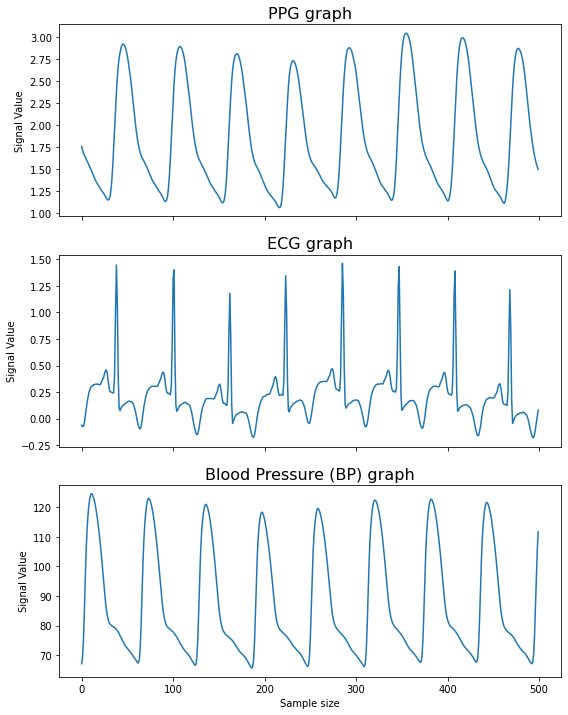

In [12]:
##plotting sample ppg, ecg and bp signals
##using a sample size of 500
fig, ax = plt.subplots(3,1, figsize=(9,12), sharex=True)

ax[0].set_title('PPG graph', fontsize=16)
ax[0].set_ylabel('Signal Value')
ax[0].plot(ppg[:500])

ax[1].set_title('ECG graph', fontsize=16)
ax[1].set_ylabel('Signal Value')
ax[1].plot(ecg[:500])

ax[2].set_title('Blood Pressure (BP) graph', fontsize=16)
ax[2].set_ylabel('Signal Value')
ax[2].set_xlabel('Sample size')
ax[2].plot(bp[:500])

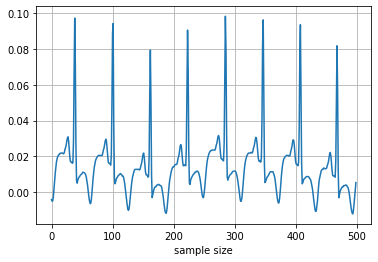

In [13]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


def run():
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 500.0
    lowcut = 0.1
    highcut = 50.0
    y = butter_bandpass_filter(ecg, lowcut, highcut, fs, order=2)
    plt.plot(y[:500])
    plt.xlabel('sample size')
    plt.grid(True)

    plt.show()


run()

In [14]:
fs = 500.0
lowcut = 0.1
highcut = 50.0
ecg_new=butter_bandpass_filter(ecg, lowcut, highcut, fs, order=2)

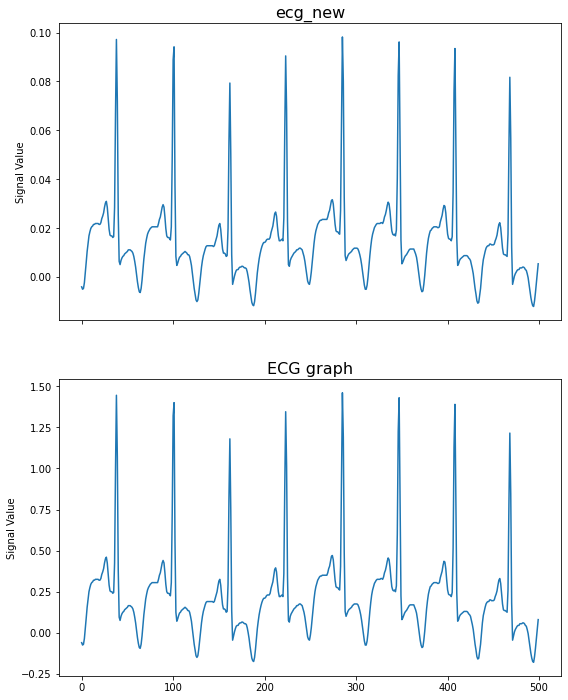

In [15]:
fig, ax = plt.subplots(2,1, figsize=(9,12), sharex=True)

ax[0].set_title('ecg_new', fontsize=16)
ax[0].set_ylabel('Signal Value')
ax[0].plot(ecg_new[:500])

ax[1].set_title('ECG graph', fontsize=16)
ax[1].set_ylabel('Signal Value')
ax[1].plot(ecg[:500])

In [16]:
pip install neurokit2

Note: you may need to restart the kernel to use updated packages.


In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal
import scipy.stats
import neurokit2 as nk

In [18]:
ecg_new.shape

(308989000, 1)

In [19]:
ecg_new=ecg_new.reshape(len(ecg_new))

In [20]:
bp=bp.reshape(len(bp))

In [21]:
ecg_new.shape

(308989000,)

In [22]:
bp.shape

(308989000,)

In [23]:
_, rpeaks = nk.ecg_peaks(ecg_new, sampling_rate=50)

In [24]:
rpeaks

{'ECG_R_Peaks': array([       38,       101,       162, ..., 159169498, 159169561,
        159169625]),
 'sampling_rate': 50}

In [25]:
len(rpeaks.values())

2

In [26]:
a=[]
for i in rpeaks.values():
  a.append(i)

In [27]:
a

[array([       38,       101,       162, ..., 159169498, 159169561,
        159169625]),
 50]

In [28]:
peak=[]
peak=a[0]

In [29]:
peak

array([       38,       101,       162, ..., 159169498, 159169561,
       159169625])

In [30]:
len(peak)

2066605

In [31]:
ecg_new.shape

(308989000,)

In [32]:
all_peaks=[]
corr_bp=[]
i=0
while i+3<len(peak):
  j=peak[i]
  k=peak[i+3]
  temp=ecg_new[j:k+1]
  b=bp[j:k+1]
  all_peaks.append(temp)
  corr_bp.append(b)
  i+=4


In [33]:
len(all_peaks)

516651

In [34]:
len(corr_bp)

516651

In [35]:
new_data=np.array(all_peaks)

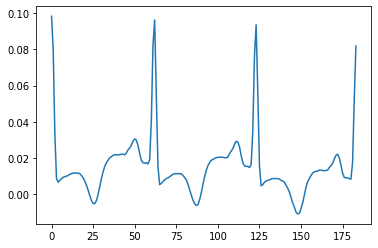

In [36]:
plt.plot(all_peaks[1])

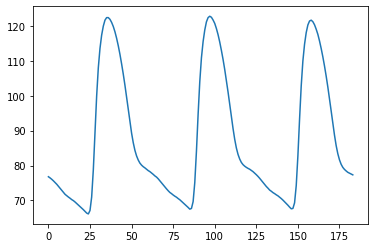

In [37]:
plt.plot(corr_bp[1])

In [38]:
from scipy import signal
from scipy.fft import fft, fftfreq, fftshift
import scipy.fft
f=scipy.signal.resample(all_peaks[1], 120)
b=scipy.signal.resample(corr_bp[1], 120)


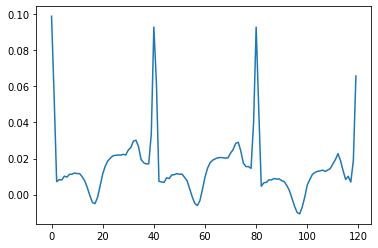

In [39]:
plt.plot(f)

In [40]:
f_peak=[]
f_bp=[]
for i in range(len(all_peaks)):
    f=scipy.signal.resample(all_peaks[i], 120)
    b=scipy.signal.resample(corr_bp[i], 120)
    f_peak.append(f);
    f_bp.append(b)


In [41]:
f_peak=np.array(f_peak)
f_bp=np.array(f_bp)

In [42]:
f_peak.shape

(516651, 120)

In [43]:
f_bp.shape

(516651, 120)

In [44]:
bp=[]
ecg=[]
Map=[]
sbp=[]
dbp=[]

In [45]:
ecga=[]  #Normal
ecgb=[]  # perhyper
ecgc=[]  #hyper
sbpa=[]
sbpb=[]
sbpc=[]
dbpa=[]
dbpb=[]
dbpc=[]

for i in range(len(f_bp)):
  sbp=max(f_bp[i])
  dbp=min(f_bp[i])
  if (sbp <= 90 or dbp <= 60):
    ecga.append(f_peak[i])
    sbpa.append(sbp)
    dbpa.append(dbp)
  if ((sbp >= 90 and sbp < 120) and (dbp >= 60 and dbp < 79)):
    ecga.append(f_peak[i])
    sbpa.append(sbp)
    dbpa.append(dbp)
  if ((sbp >= 120 and sbp < 140) or (dbp >= 80 and dbp < 90)):
    ecgb.append(f_peak[i])
    sbpb.append(sbp)
    dbpb.append(dbp)
  if ((sbp >= 140 and sbp < 160) or (dbp >= 90 and dbp < 100)):
    ecgc.append(f_peak[i])
    sbpc.append(sbp)
    dbpc.append(dbp)
  if (sbp >= 160 or dbp >= 100):
    ecgc.append(f_peak[i])
    sbpc.append(sbp)
    dbpc.append(dbp)
  if (sbp >= 140 and dbp < 90):
    ecgc.append(f_peak[i])
    sbpc.append(sbp)
    dbpc.append(dbp)
  if (sbp >= 180 or dbp >= 110):
    ecgc.append(f_peak[i])
    sbpc.append(sbp)
    dbpc.append(dbp)

In [46]:
ecga=np.array(ecga)  #Normal
ecgb=np.array(ecgb)   # perhyper
ecgc=np.array(ecgc)   #hyper
sbpa=np.array(sbpa) 
sbpb=np.array(sbpb) 
sbpc=np.array(sbpc) 
dbpa=np.array(dbpa) 
dbpb=np.array(dbpb) 
dbpc=np.array(dbpc) 

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ecga,sbpa, test_size=0.33)

In [48]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import KFold, train_test_split # cross validation split
from sklearn.metrics import mean_squared_error

In [49]:
def rmse(y_true, y_pred):
    """Computes the Root Mean Squared Error (RMSE)."""
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [50]:
from sklearn.metrics import mean_absolute_error

In [51]:
folds = KFold(n_splits=5, shuffle=False)
scores = []
for i, (train_index, val_index) in enumerate(folds.split(X_train, y_train)):
    train_data, target = X_train[train_index], y_train[train_index]
    validation_data, val_target = X_train[val_index], y_train[val_index]
    
    model = AdaBoostRegressor(random_state=1, n_estimators=100)
    model.fit(train_data, target)
    #model = RandomForestRegressor(n_estimators=50,max_depth=5, n_jobs=-1, random_state=42)
    #model.fit(train_data[:100000], target[:100000].squeeze())  # training on few samples to save time.
    val_predictions = model.predict(validation_data)
    error = rmse(val_target, val_predictions)
    scores.append(error)
    print(f'Fold {i} RMSE: {error}')
print(f'Average RMSE over 5 folds: {np.mean(scores)}')

Fold 0 RMSE: 19.74504488356907
Fold 1 RMSE: 17.143016771967
Fold 2 RMSE: 17.85254153833623
Fold 3 RMSE: 18.529565065032337
Fold 4 RMSE: 17.454075680443545
Average RMSE over 5 folds: 18.144848787869638


In [52]:
# from sklearn.ensemble import AdaBoostRegressor
# regr = AdaBoostRegressor(random_state=1, n_estimators=100,loss='exponential')
# regr.fit(X_train, y_train)

In [53]:
# x=regr.predict(X_test)

In [54]:
# plt.scatter(X_test,y_test)
# plt.scatter(X_test,x)

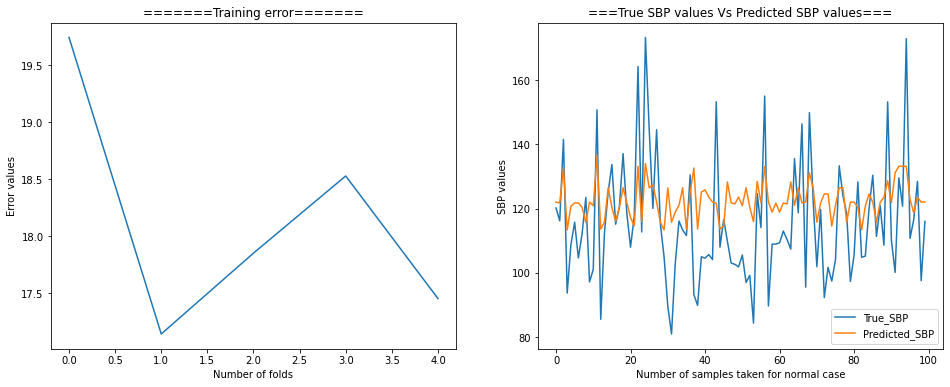

In [55]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
ax[0].set_title("=======Training error=======")
ax[0].set_xlabel('Number of folds')
ax[0].set_ylabel('Error values')
ax[0].plot(scores)

# Visualize predicted BP and the True BP
ax[1].set_title("===True SBP values Vs Predicted SBP values===")
ax[1].set_xlabel('Number of samples taken for normal case')
ax[1].set_ylabel('SBP values')
ax[1].plot(val_target[:100]) #only plotting 100 samples
ax[1].plot(val_predictions[:100])
ax[1].legend(['True_SBP', 'Predicted_SBP'])

In [56]:
mean_absolute_error(val_target, val_predictions)

14.069919969991107

#DBP



In [57]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(ecga,dbpa, test_size=0.33)

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ecga,dbpa, test_size=0.33)

In [59]:
folds = KFold(n_splits=5, shuffle=False)
scores = []
for i, (train_index, val_index) in enumerate(folds.split(X_train, y_train)):
    train_data, target = X_train[train_index], y_train[train_index]
    validation_data, val_target = X_train[val_index], y_train[val_index]
    
    model_dbp = AdaBoostRegressor(random_state=1, n_estimators=100)
    model_dbp.fit(train_data, target)
    #model = RandomForestRegressor(n_estimators=50,max_depth=5, n_jobs=-1, random_state=42)
    #model.fit(train_data[:100000], target[:100000].squeeze())  # training on few samples to save time.
    val_predictions = model_dbp.predict(validation_data)
    error = rmse(val_target, val_predictions)
    scores.append(error)
    print(f'Fold {i} RMSE: {error}')
print(f'Average RMSE over 5 folds: {np.mean(scores)}')

Fold 0 RMSE: 7.130543907896785
Fold 1 RMSE: 6.453069505910723
Fold 2 RMSE: 7.094583641741759
Fold 3 RMSE: 6.304313138991143
Fold 4 RMSE: 6.567839877762635
Average RMSE over 5 folds: 6.71007001446061


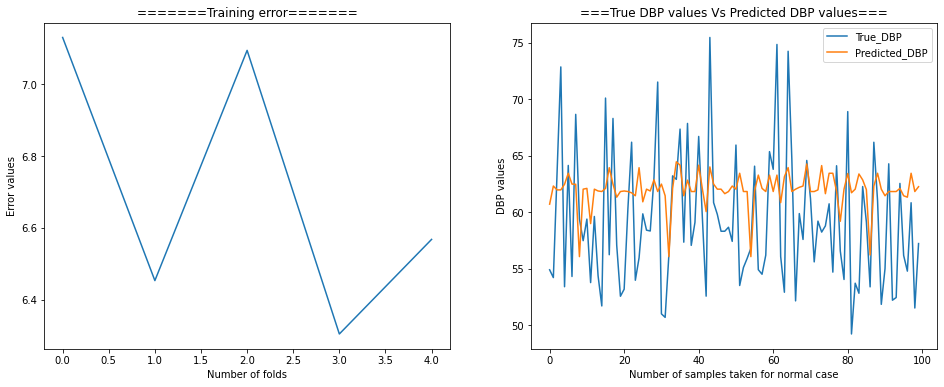

In [60]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
ax[0].set_title("=======Training error=======")
ax[0].set_xlabel('Number of folds')
ax[0].set_ylabel('Error values')
ax[0].plot(scores)

# Visualize predicted BP and the True BP
ax[1].set_title("===True DBP values Vs Predicted DBP values===")
ax[1].set_xlabel('Number of samples taken for normal case')
ax[1].set_ylabel('DBP values')
ax[1].plot(val_target[:100]) #only plotting 100 samples
ax[1].plot(val_predictions[:100])
ax[1].legend(['True_DBP', 'Predicted_DBP'])

In [61]:
mean_absolute_error(val_target, val_predictions)

5.688279122381332

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ecgb,sbpb, test_size=0.33)

In [63]:

folds = KFold(n_splits=5, shuffle=False)
scores = []
for i, (train_index, val_index) in enumerate(folds.split(X_train, y_train)):
    train_data, target = X_train[train_index], y_train[train_index]
    validation_data, val_target = X_train[val_index], y_train[val_index]
    
    model = AdaBoostRegressor(random_state=1, n_estimators=100)
    model.fit(train_data, target)
    #model = RandomForestRegressor(n_estimators=50,max_depth=5, n_jobs=-1, random_state=42)
    #model.fit(train_data[:100000], target[:100000].squeeze())  # training on few samples to save time.
    val_predictions = model.predict(validation_data)
    error = rmse(val_target, val_predictions)
    scores.append(error)
    print(f'Fold {i} RMSE: {error}')
print(f'Average RMSE over 5 folds: {np.mean(scores)}')

Fold 0 RMSE: 16.22382651423206
Fold 1 RMSE: 16.261632069209863
Fold 2 RMSE: 15.982661722329151
Fold 3 RMSE: 16.422225277061237
Fold 4 RMSE: 16.426617915027208
Average RMSE over 5 folds: 16.263392699571902


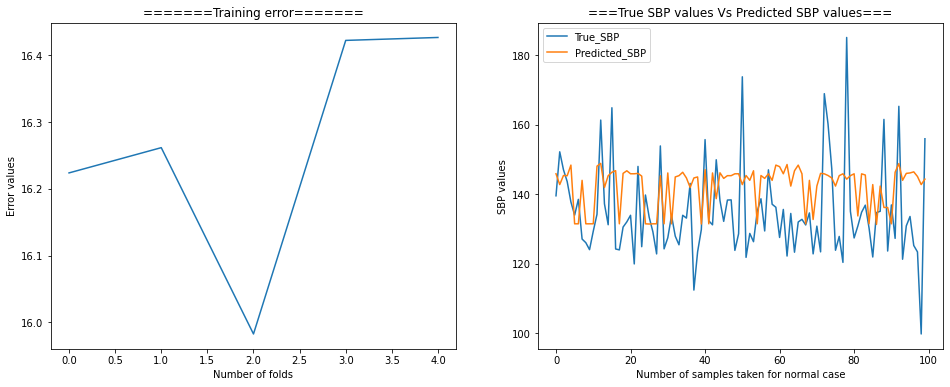

In [64]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
ax[0].set_title("=======Training error=======")
ax[0].set_xlabel('Number of folds')
ax[0].set_ylabel('Error values')
ax[0].plot(scores)

# Visualize predicted BP and the True BP
ax[1].set_title("===True SBP values Vs Predicted SBP values===")
ax[1].set_xlabel('Number of samples taken for normal case')
ax[1].set_ylabel('SBP values')
ax[1].plot(val_target[:100]) #only plotting 100 samples
ax[1].plot(val_predictions[:100])
ax[1].legend(['True_SBP', 'Predicted_SBP'])

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ecgb,dbpb, test_size=0.33)

In [66]:

folds = KFold(n_splits=5, shuffle=False)
scores = []
for i, (train_index, val_index) in enumerate(folds.split(X_train, y_train)):
    train_data, target = X_train[train_index], y_train[train_index]
    validation_data, val_target = X_train[val_index], y_train[val_index]
    
    model = AdaBoostRegressor(random_state=1, n_estimators=100)
    model.fit(train_data, target)
    #model = RandomForestRegressor(n_estimators=50,max_depth=5, n_jobs=-1, random_state=42)
    #model.fit(train_data[:100000], target[:100000].squeeze())  # training on few samples to save time.
    val_predictions = model.predict(validation_data)
    error = rmse(val_target, val_predictions)
    scores.append(error)
    print(f'Fold {i} RMSE: {error}')
print(f'Average RMSE over 5 folds: {np.mean(scores)}')

Fold 0 RMSE: 15.586633330474324
Fold 1 RMSE: 13.144614735675178
Fold 2 RMSE: 16.14137727385291
Fold 3 RMSE: 15.751834419600833
Fold 4 RMSE: 16.651289449878874
Average RMSE over 5 folds: 15.455149841896423


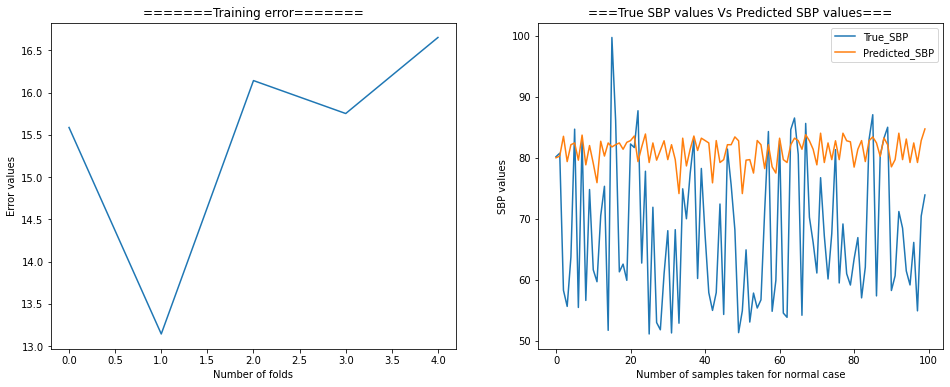

In [67]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
ax[0].set_title("=======Training error=======")
ax[0].set_xlabel('Number of folds')
ax[0].set_ylabel('Error values')
ax[0].plot(scores)

# Visualize predicted BP and the True BP
ax[1].set_title("===True SBP values Vs Predicted SBP values===")
ax[1].set_xlabel('Number of samples taken for normal case')
ax[1].set_ylabel('SBP values')
ax[1].plot(val_target[:100]) #only plotting 100 samples
ax[1].plot(val_predictions[:100])
ax[1].legend(['True_SBP', 'Predicted_SBP'])

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ecgc,sbpc, test_size=0.33)

In [69]:

folds = KFold(n_splits=5, shuffle=False)
scores = []
for i, (train_index, val_index) in enumerate(folds.split(X_train, y_train)):
    train_data, target = X_train[train_index], y_train[train_index]
    validation_data, val_target = X_train[val_index], y_train[val_index]
    
    model = AdaBoostRegressor(random_state=1, n_estimators=100)
    model.fit(train_data, target)
    #model = RandomForestRegressor(n_estimators=50,max_depth=5, n_jobs=-1, random_state=42)
    #model.fit(train_data[:100000], target[:100000].squeeze())  # training on few samples to save time.
    val_predictions = model.predict(validation_data)
    error = rmse(val_target, val_predictions)
    scores.append(error)
    print(f'Fold {i} RMSE: {error}')
print(f'Average RMSE over 5 folds: {np.mean(scores)}')

Fold 0 RMSE: 13.333836159509017
Fold 1 RMSE: 13.38779273968997
Fold 2 RMSE: 13.420397449372993
Fold 3 RMSE: 13.321338726603491
Fold 4 RMSE: 13.389433773391882
Average RMSE over 5 folds: 13.370559769713472


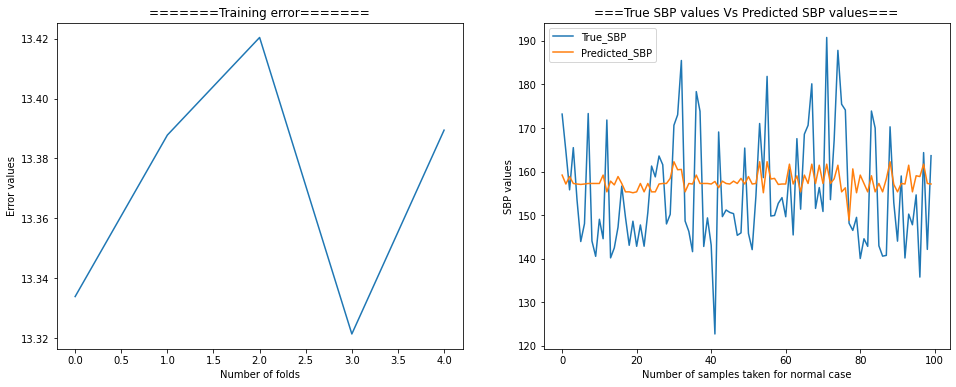

In [70]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
ax[0].set_title("=======Training error=======")
ax[0].set_xlabel('Number of folds')
ax[0].set_ylabel('Error values')
ax[0].plot(scores)

# Visualize predicted BP and the True BP
ax[1].set_title("===True SBP values Vs Predicted SBP values===")
ax[1].set_xlabel('Number of samples taken for normal case')
ax[1].set_ylabel('SBP values')
ax[1].plot(val_target[:100]) #only plotting 100 samples
ax[1].plot(val_predictions[:100])
ax[1].legend(['True_SBP', 'Predicted_SBP'])

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ecgc,dbpc, test_size=0.33)

In [72]:

folds = KFold(n_splits=5, shuffle=False)
scores = []
for i, (train_index, val_index) in enumerate(folds.split(X_train, y_train)):
    train_data, target = X_train[train_index], y_train[train_index]
    validation_data, val_target = X_train[val_index], y_train[val_index]
    
    model = AdaBoostRegressor(random_state=1, n_estimators=100)
    model.fit(train_data, target)
    #model = RandomForestRegressor(n_estimators=50,max_depth=5, n_jobs=-1, random_state=42)
    #model.fit(train_data[:100000], target[:100000].squeeze())  # training on few samples to save time.
    val_predictions = model.predict(validation_data)
    error = rmse(val_target, val_predictions)
    scores.append(error)
    print(f'Fold {i} RMSE: {error}')
print(f'Average RMSE over 5 folds: {np.mean(scores)}')

Fold 0 RMSE: 22.42869775195934
Fold 1 RMSE: 24.18426211041575
Fold 2 RMSE: 26.421205544700328
Fold 3 RMSE: 25.40598033618629
Fold 4 RMSE: 26.420851371335523
Average RMSE over 5 folds: 24.97219942291945


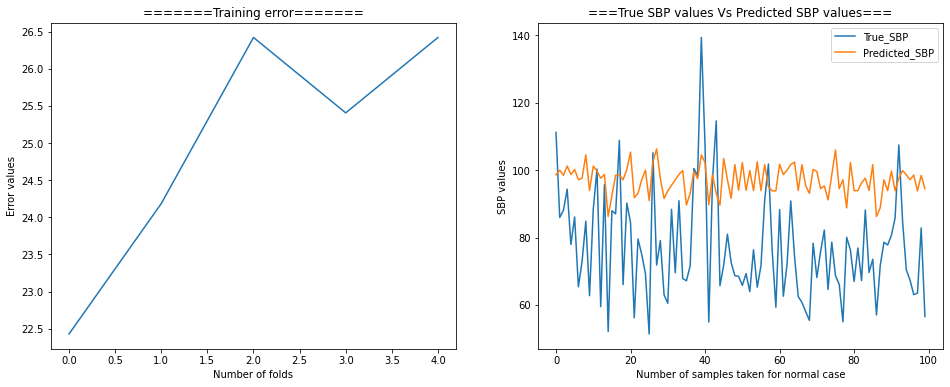

In [73]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
ax[0].set_title("=======Training error=======")
ax[0].set_xlabel('Number of folds')
ax[0].set_ylabel('Error values')
ax[0].plot(scores)

# Visualize predicted BP and the True BP
ax[1].set_title("===True SBP values Vs Predicted SBP values===")
ax[1].set_xlabel('Number of samples taken for normal case')
ax[1].set_ylabel('SBP values')
ax[1].plot(val_target[:100]) #only plotting 100 samples
ax[1].plot(val_predictions[:100])
ax[1].legend(['True_SBP', 'Predicted_SBP'])